# Importance of Nodes and Groups

The data consists of interactions and mentions between characters in the Star Wars sci-fi film episoded 1 to 7. We try to help `Palpatine` to conquer the universe by using social network analysis. By calculating centrality measures we will find those characters who `Palpatine` needs to influence or eliminate to help him for his evil plan. 

Specific Questions:
- Closeness
  - Which characters spread information most efficiently and need to be influenced therefore?
- Betweenness
  - Divide and qonquer
  - Which characters lie between the shortest paths between other nodes and act therefore as bridges? To eliminate them would help us to disconnect the network.

General questions:

- Degree
  - Is a character with a high degree centrality value automatically the main actor?

- Who is important based on interactions/mentions?
- How does the importance of characters change over time?
- Who is connected to influential characters? (Eigenvector)
- Which characters connect different parts of the network? (Betweenness)
- Which characters can reach others quickly and thus spread information easily? (Closeness)


## By Episodes

### Degree

A high degree centrality value for the interaction dataset should tell us who the main character is, as this character appears most frequently in each episode.<br>
From episode 1 to 6, the character with the highest degree centrality value is also the main character, except in episode 7.<br>
In episode 7, `POE`, `FINN` and `HAN` have a high degree centrality, but the main character is Daisy Ridley as `REY`.<br>
This is counter intuitive as you would expect the lead actor to appear more often than the other actors.

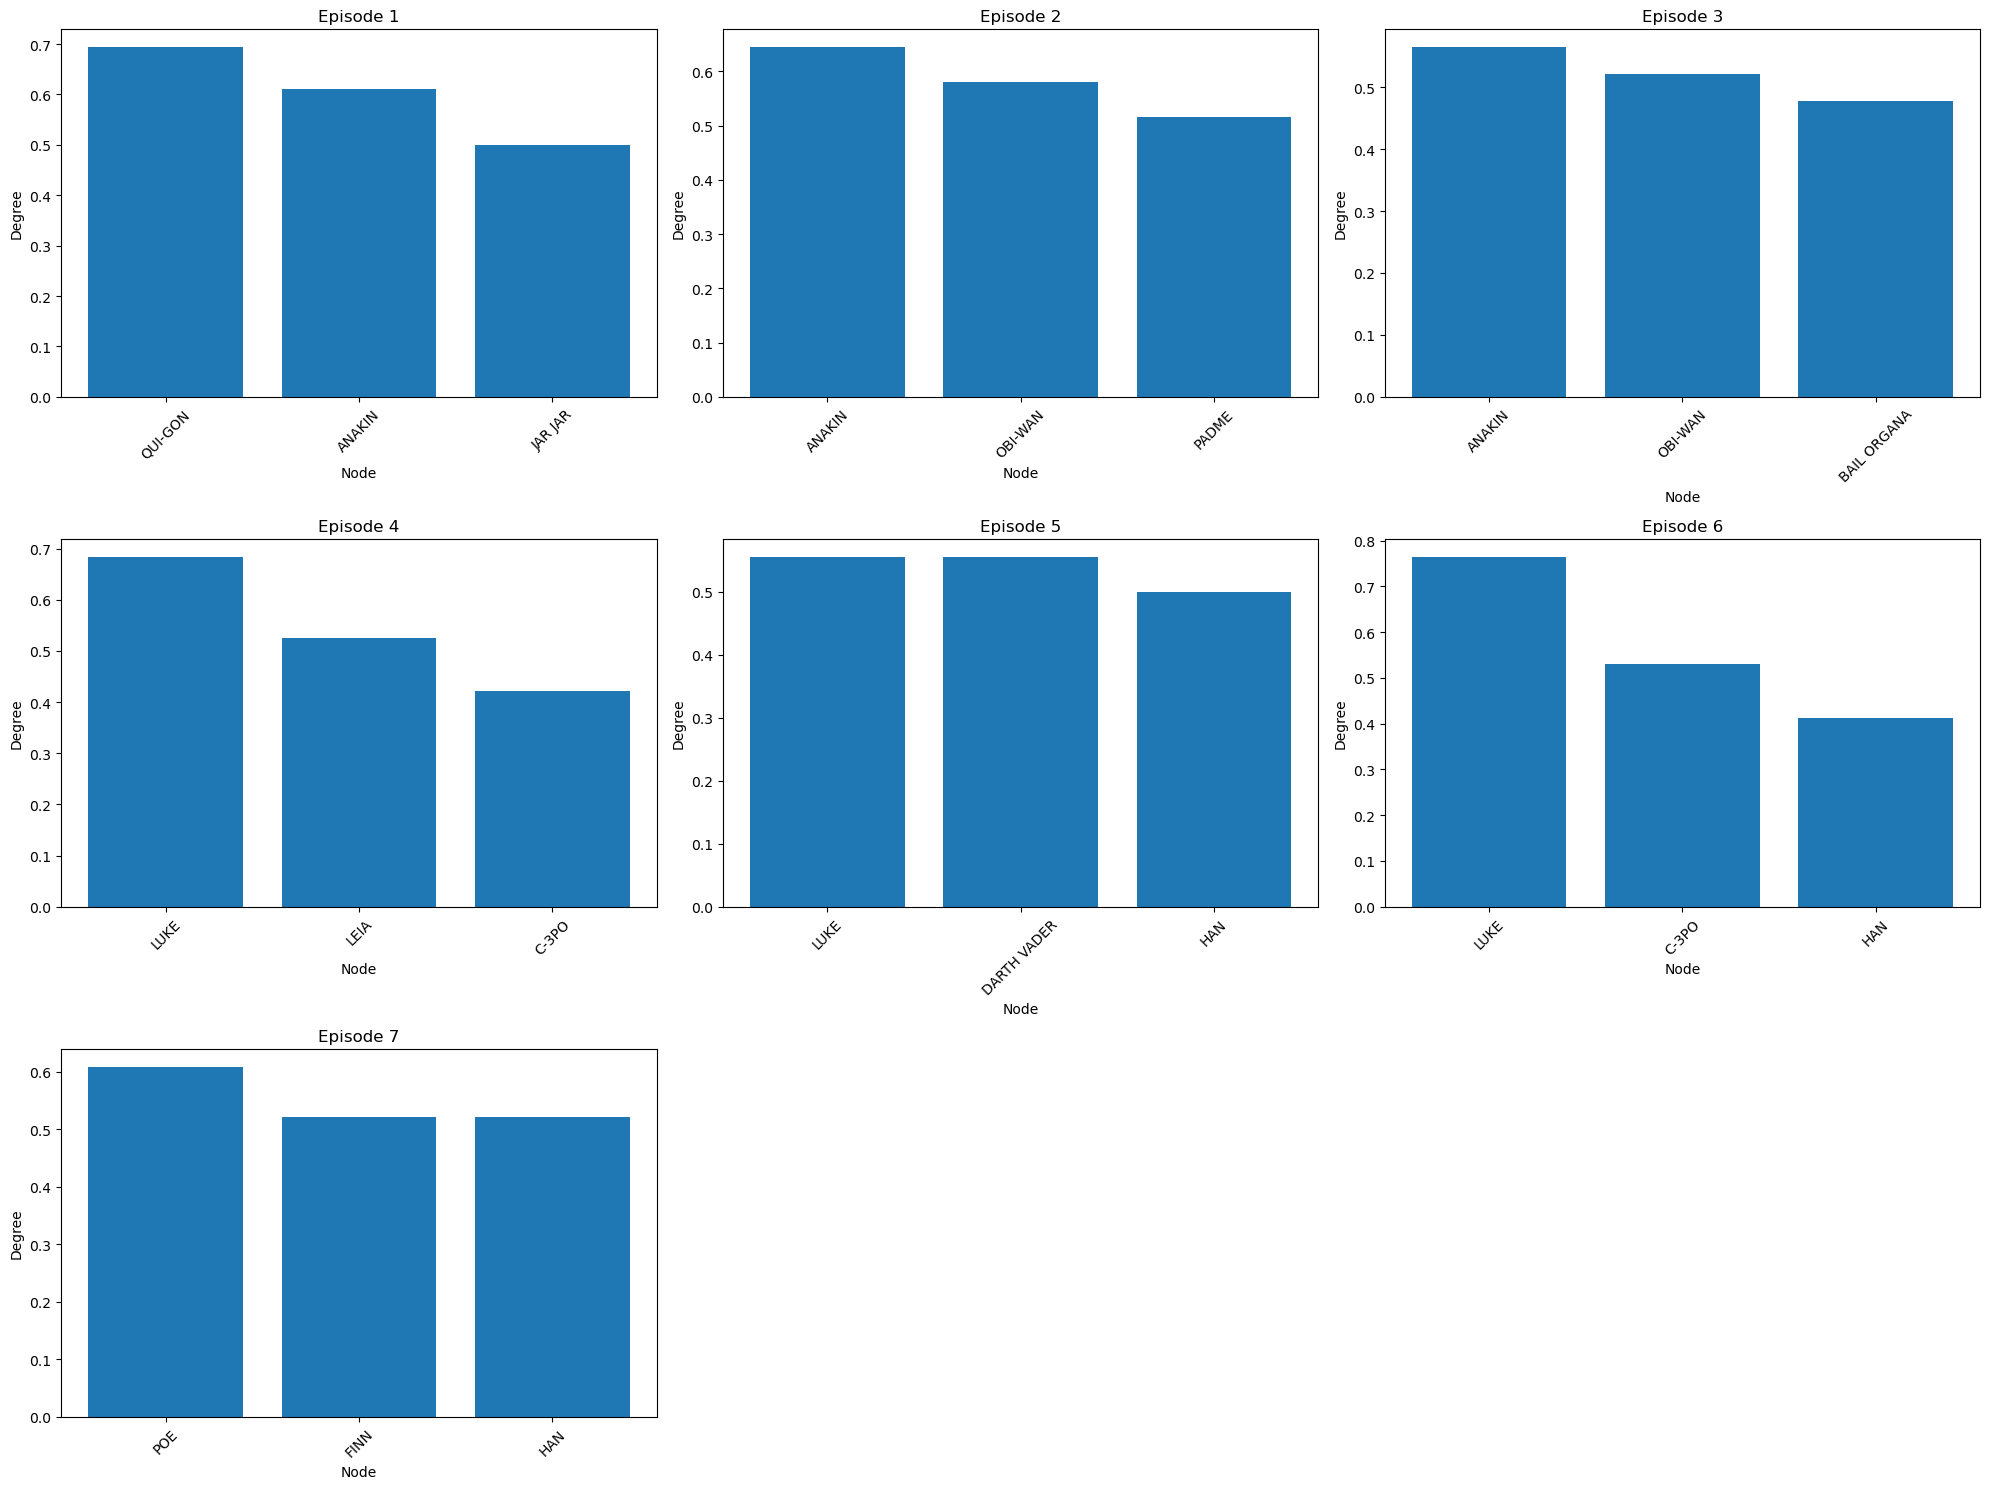

In [11]:
import os
import plots
import importlib
importlib.reload(plots)

interaction_files = [
    f
    for f in os.listdir("data/")
    if "full" not in f and "interactions" in f and "allCharacters" not in f
]
interaction_files.sort(key=lambda x: int(x.split("-")[2]))
plots.plot_centrality_over_time(interaction_files, centrality_type="degree")

<module 'matplotlib.pyplot' from '/Users/hariveliki/miniconda3/envs/san/lib/python3.10/site-packages/matplotlib/pyplot.py'>

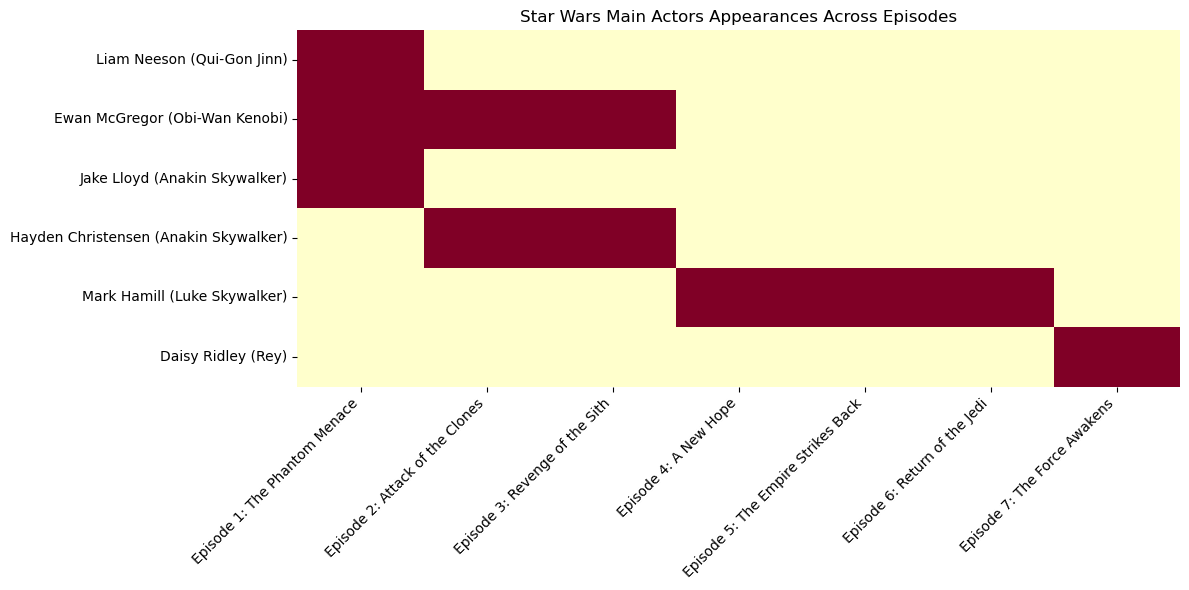

In [12]:
plots.plot_actor_appearances()

### Closeness

Closeness centrality tells how efficient can you reach all other nodes based the affected node.<br>
This means for the star wars series, which role spreads information to all other roles most efficiently, considering the shortest paths.

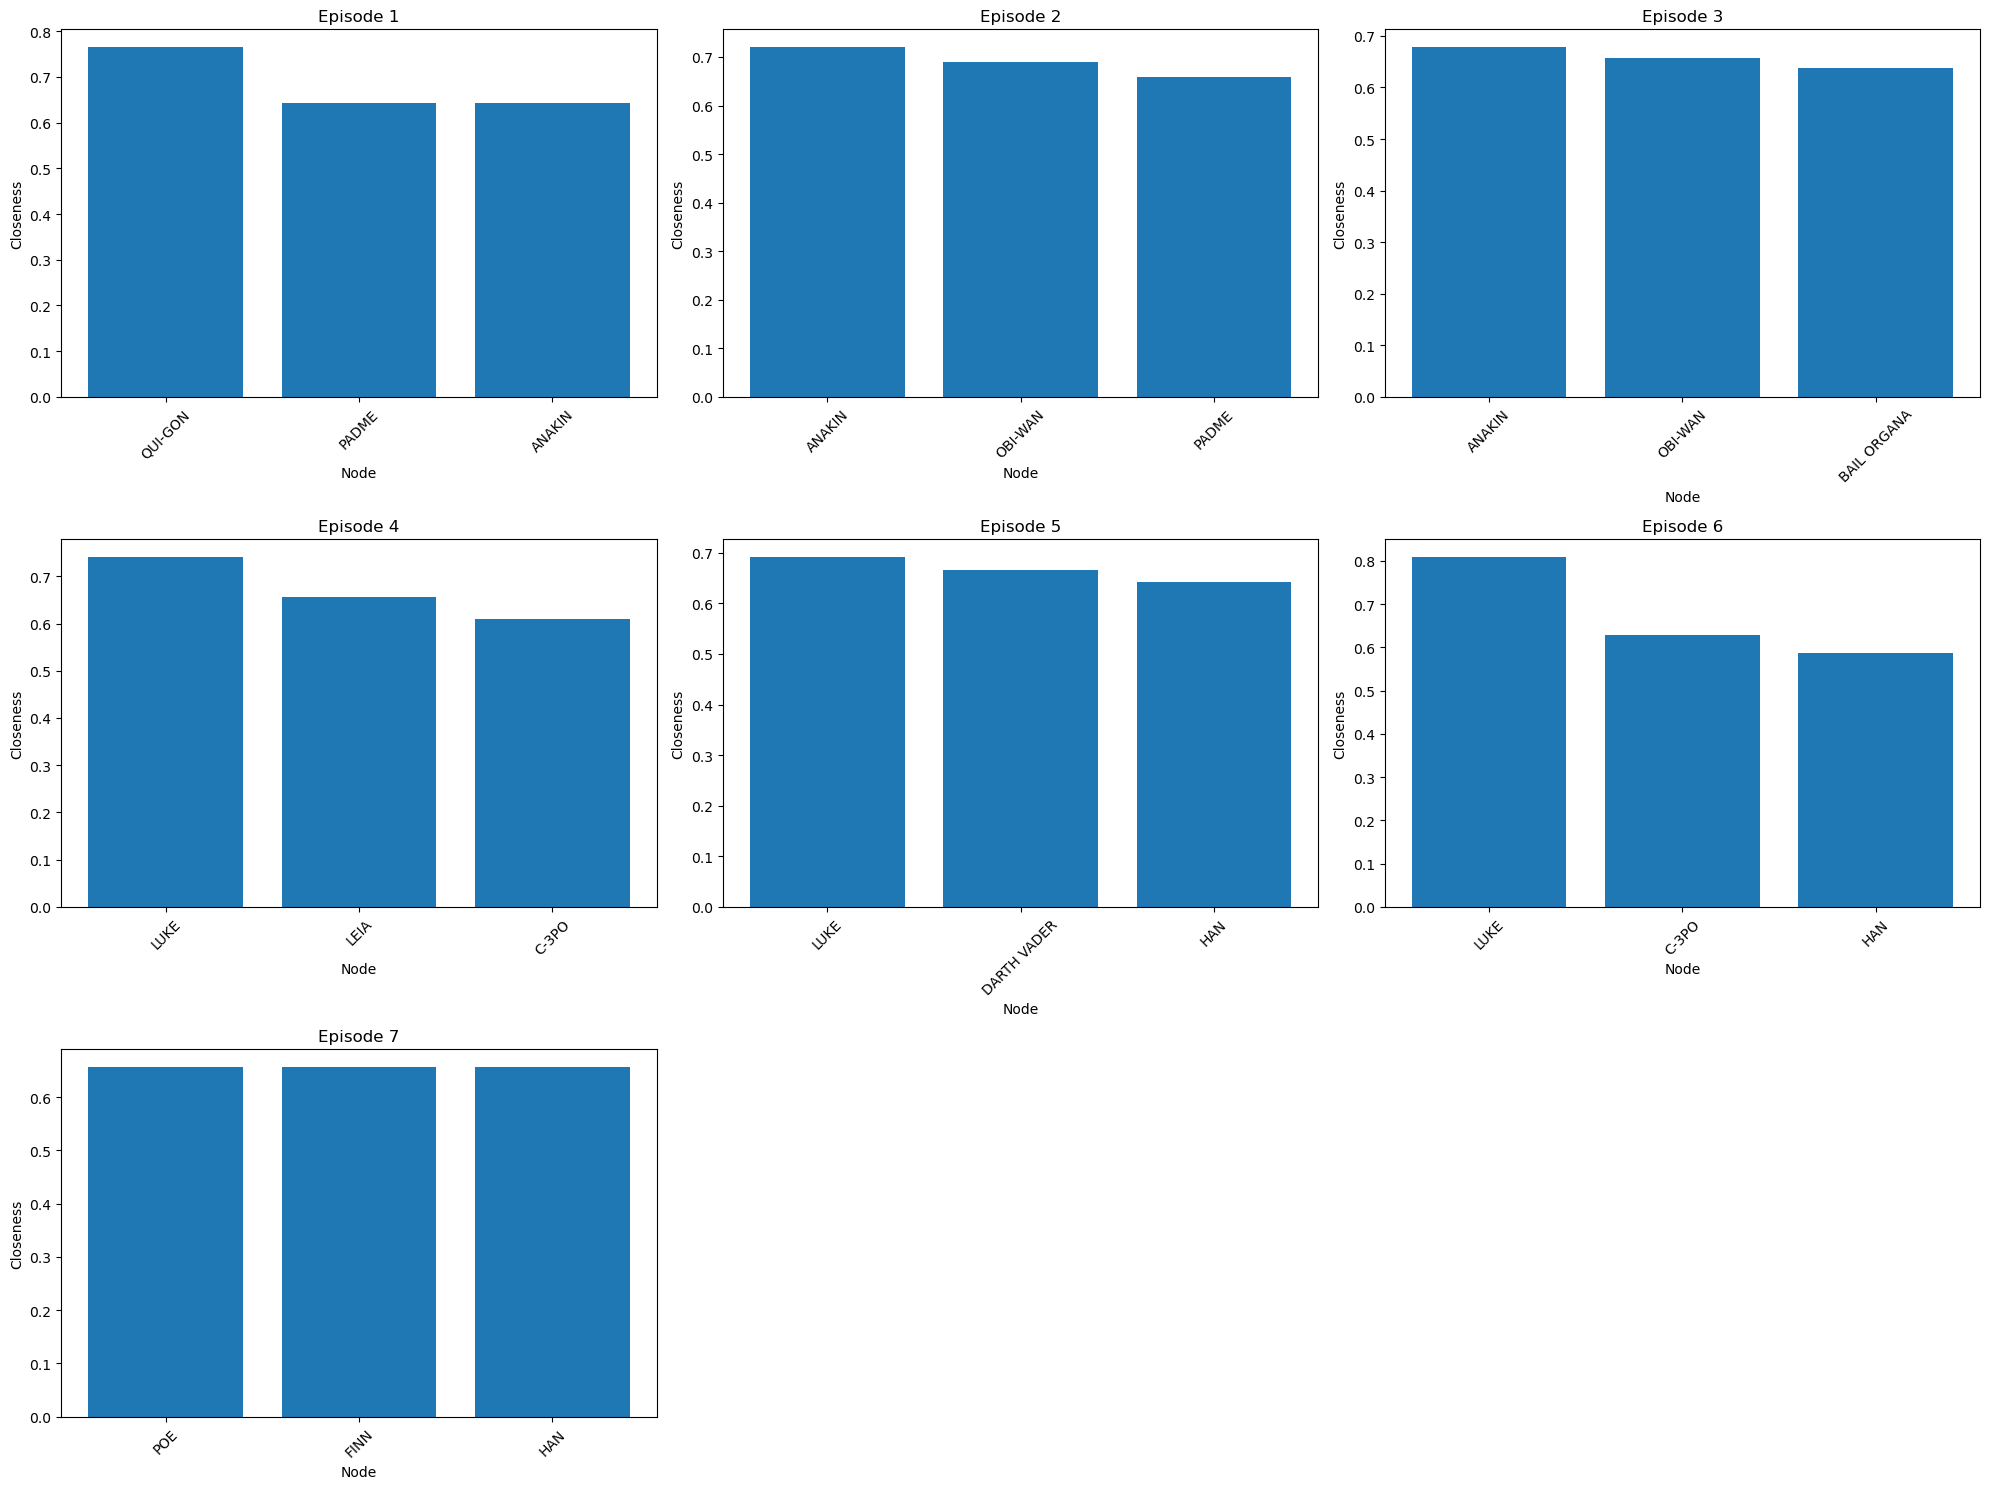

In [19]:
import os
import networkx as nx
import plots
import importlib

importlib.reload(plots)
from plots import plot_centrality_over_time

interaction_files = [
    f
    for f in os.listdir("data/")
    if "full" not in f and "interactions" in f and "allCharacters" not in f
]
interaction_files.sort(key=lambda x: int(x.split("-")[2]))

plot_centrality_over_time(interaction_files, centrality_type="closeness")

# Full Interactions and All Centralities

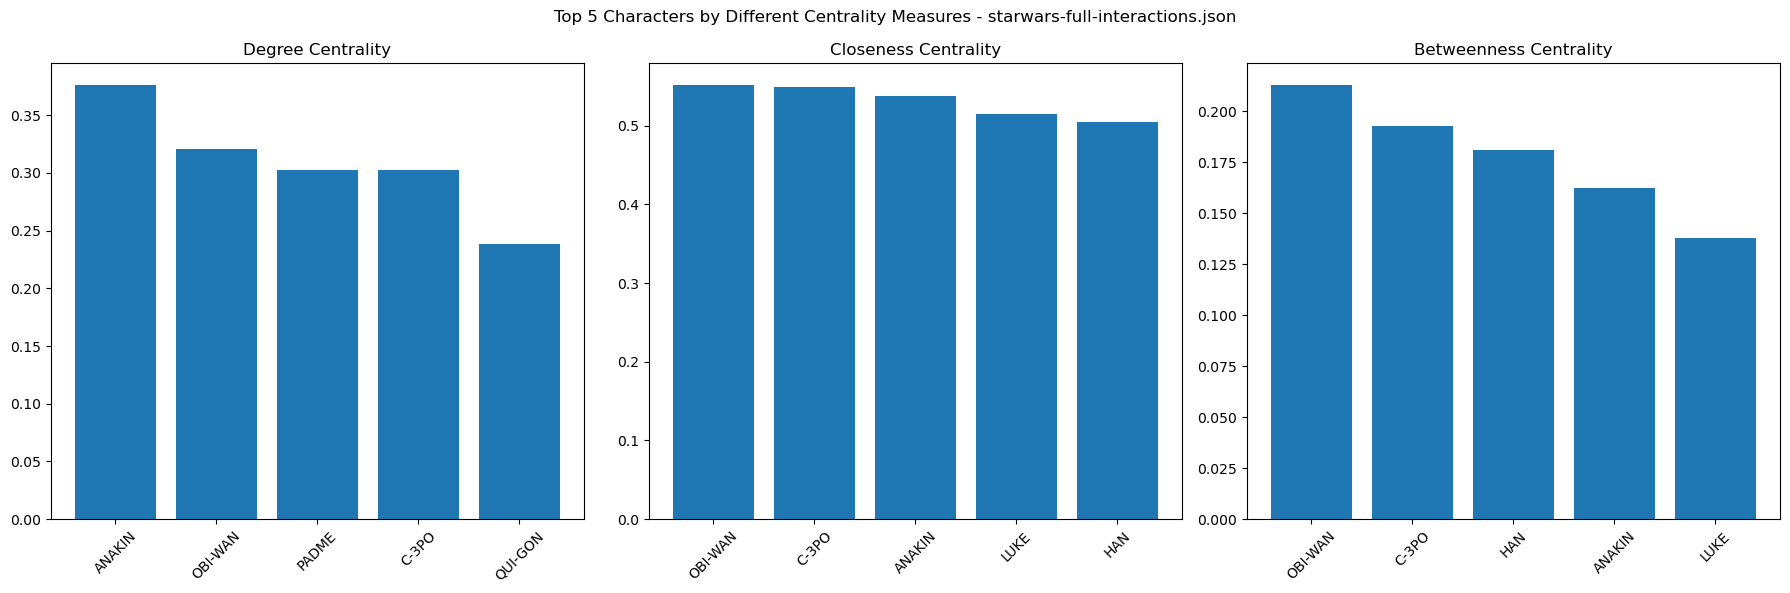

In [1]:
import plots
import importlib
importlib.reload(plots)

full_interactions_path = "starwars-full-interactions.json"
plots.plot_centralities(full_interactions_path, top_n=5)

# Communities

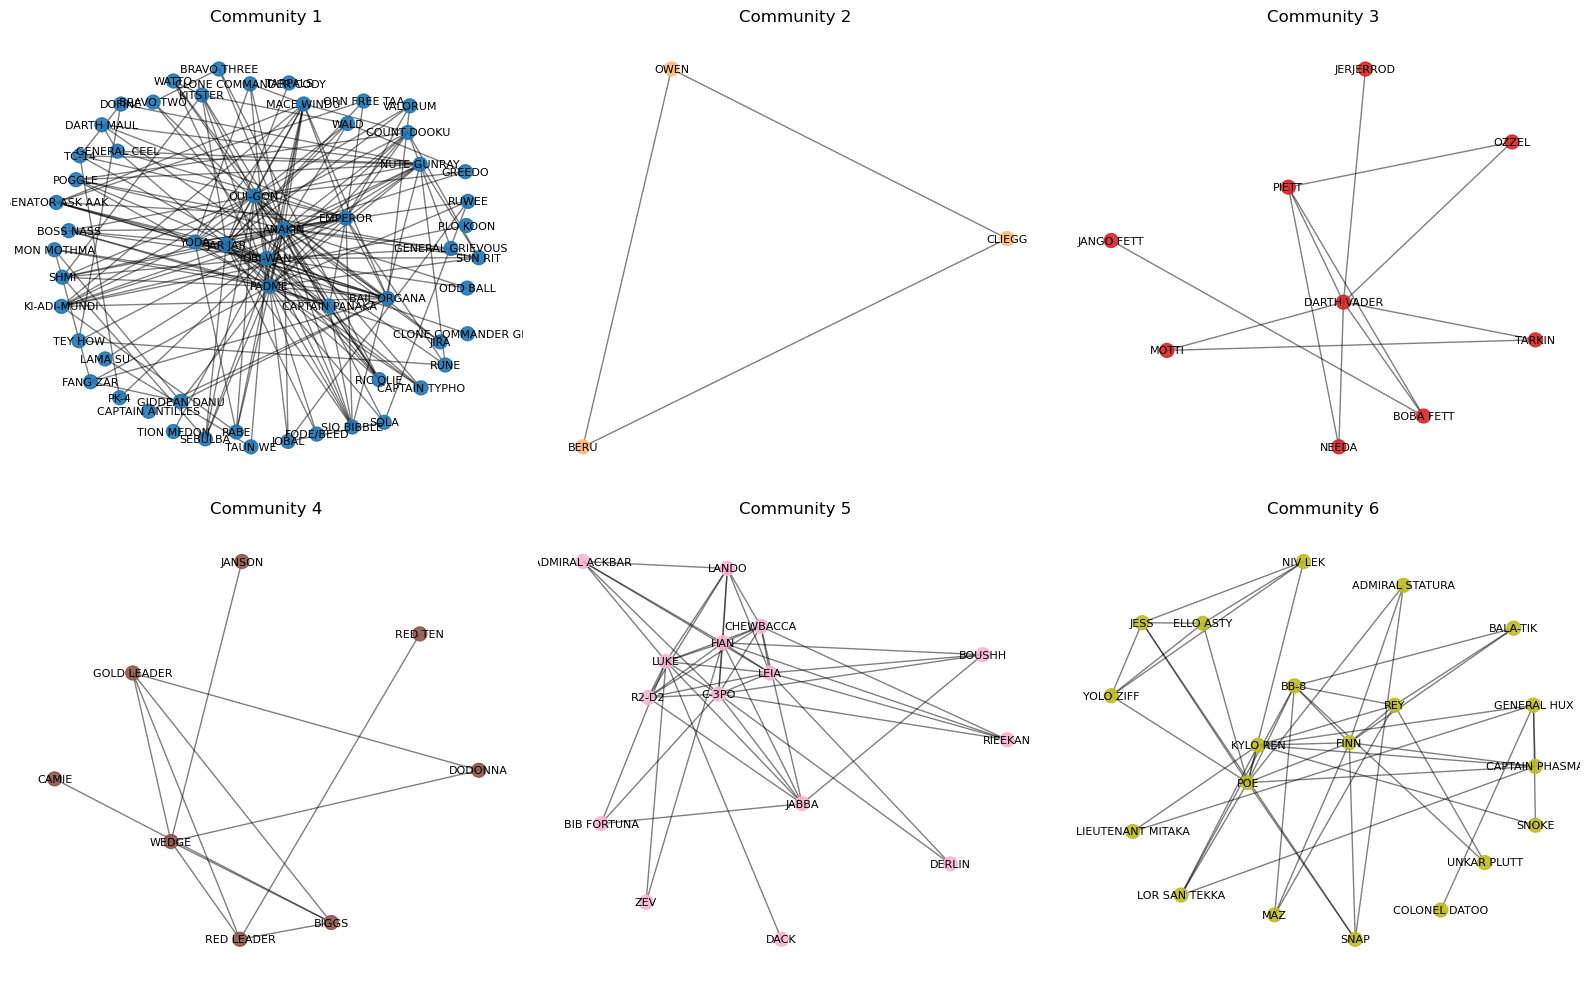

In [48]:
import plots
import importlib
importlib.reload(plots)

plots.plot_louvain_communities("starwars-full-interactions-allCharacters.json")

In [49]:
import communities
import importance
import plots
import importlib
import utils

importlib.reload(plots)
importlib.reload(importance)
importlib.reload(communities)
importlib.reload(utils)

plots.plot_top_nodes_by_community(
    "starwars-full-interactions-allCharacters.json",
    centrality_type="closeness",
    top_n=3,
)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Graph with 112 nodes and 450 edges'

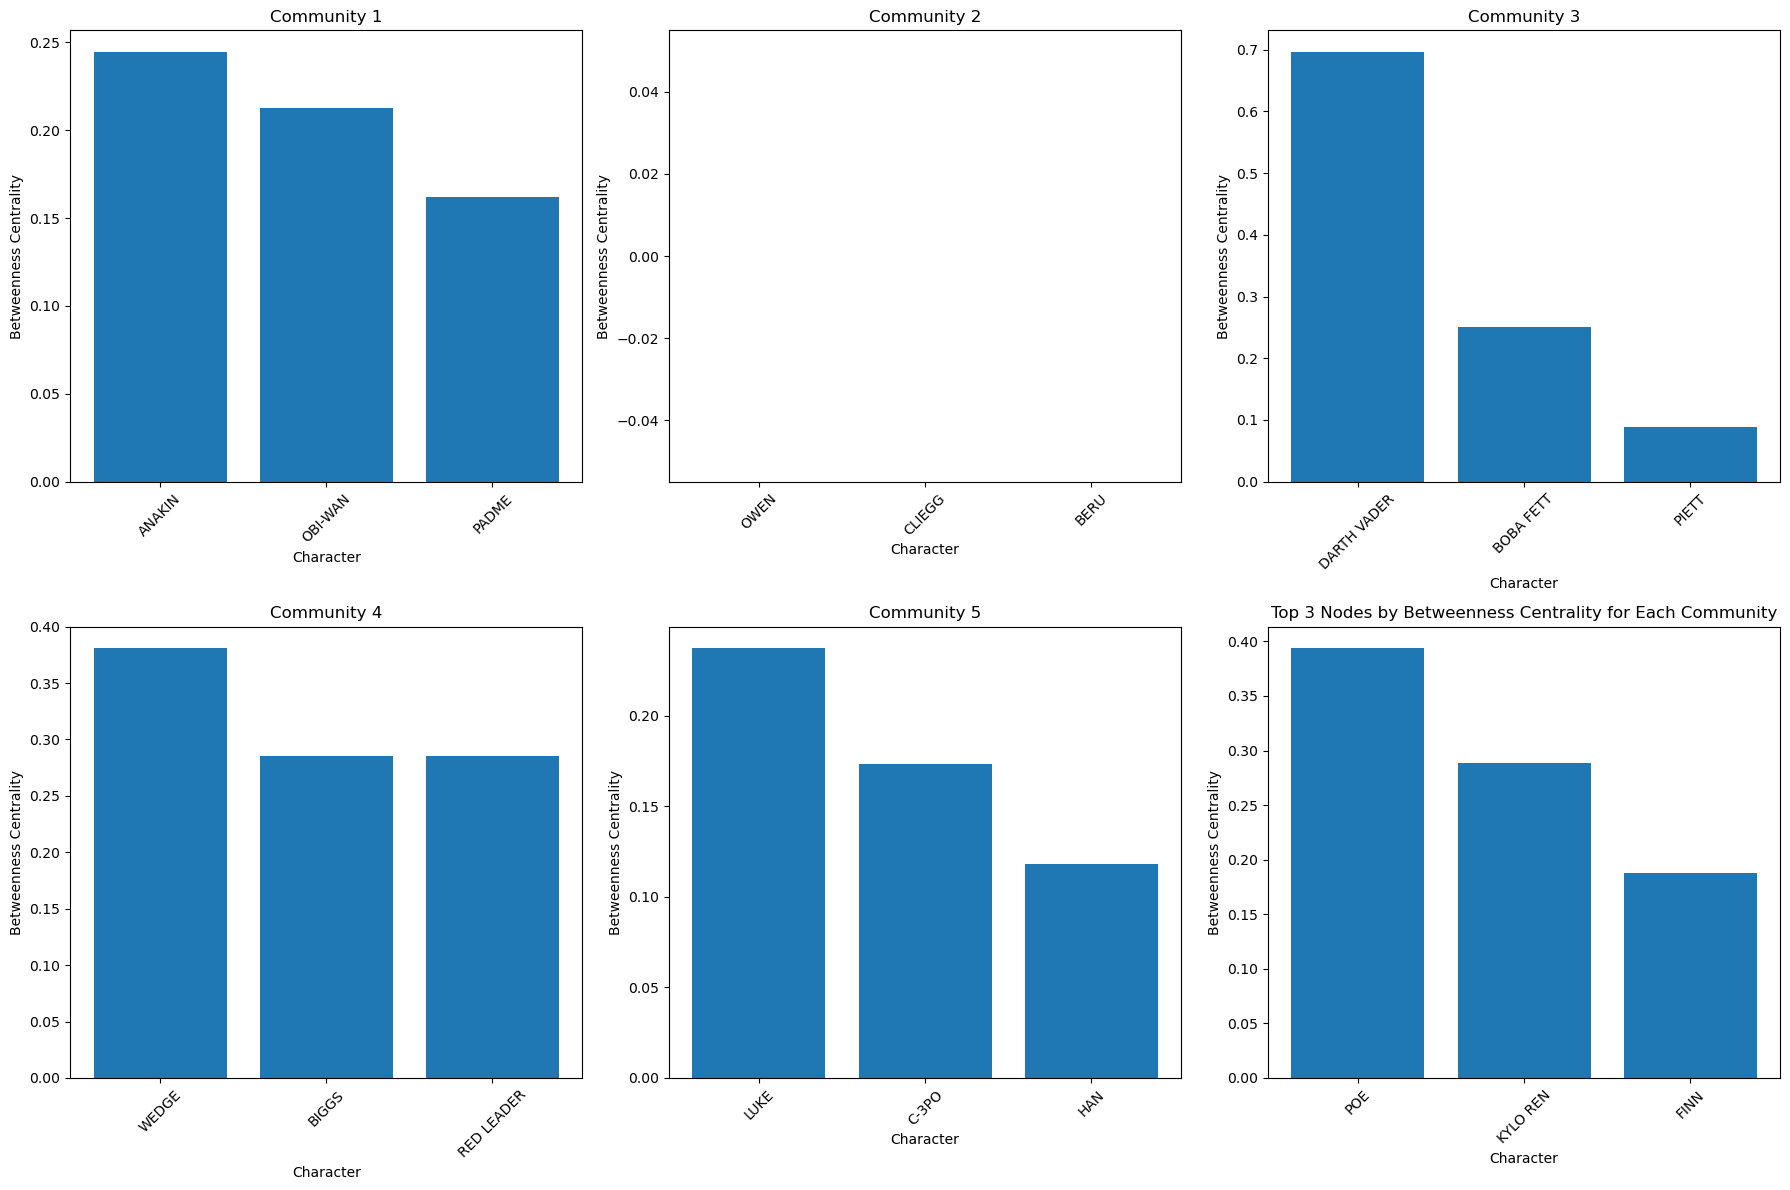

In [46]:
import matplotlib.pyplot as plt
import communities
import importance
import plots
import importlib
import utils

importlib.reload(plots)
importlib.reload(importance)
importlib.reload(communities)
importlib.reload(utils)

plots.plot_top_nodes_by_community("starwars-full-interactions-allCharacters.json", centrality_type="betweenness", top_n=3)